# 1.Introduction

Milestone 2

Nama : Stephanus Adinata S

Batch : SBY-001

Data : [Dataset](https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset/)

Objective : The objective of this project is to predict employee turnover using best parameter pipeline, the dataset is from India

# 2.Import Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score #
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder

#model
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

#evaluasi Logistics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay

#save model
import pickle
import json

# Model Training - Random Forest - Using SVM as Base Model
from sklearn.ensemble import AdaBoostClassifier

#pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) # Atur agar semua kolom ter load

# 3. Loading Data

Data yang digunakan berasal dari [Dataset](https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset/)

In [81]:
df_ori = pd.read_csv("Employee.csv")

In [82]:
df = df_ori.copy() #backup df

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [84]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [85]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [86]:
df['Age'].max()

41

## 3.1 Colomn Creation

Kita akan mengganti value pada Education menjadi value angka agar mudah pada saat encoding ordinal

In [87]:
angka = {'Bachelors': 1, 'Masters': 2, 'PHD': 3}
df['Education'] = df['Education'].replace(angka)


Berikut Keterangan kolom Education yang baru

| Value | Meaning |
| --- | --- |
| 1 | Bachelors |
| 2 | Masters |
| 3 | PHD |

In [88]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,1,2017,Bangalore,3,34,Male,No,0,0
1,1,2013,Pune,1,28,Female,No,3,1
2,1,2014,New Delhi,3,38,Female,No,2,0
3,2,2016,Bangalore,3,27,Male,No,5,1
4,2,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,1,2013,Bangalore,3,26,Female,No,4,0
4649,2,2013,Pune,2,37,Male,No,2,1
4650,2,2018,New Delhi,3,27,Male,No,5,1
4651,1,2012,Bangalore,3,30,Male,Yes,2,0


In [89]:
df['ExperienceInCurrentDomain'].max()

7

# 4.EDA

## 4.1 EDA Kolom Target (LeaveOrNot)

In [90]:
target = df["LeaveOrNot"].value_counts().reset_index()
persen = df["LeaveOrNot"].value_counts(normalize=True).reset_index()
target["percentage"] = persen["LeaveOrNot"]
target

,index,LeaveOrNot,percentage
0,0,3053,0.656136
1,1,1600,0.343864


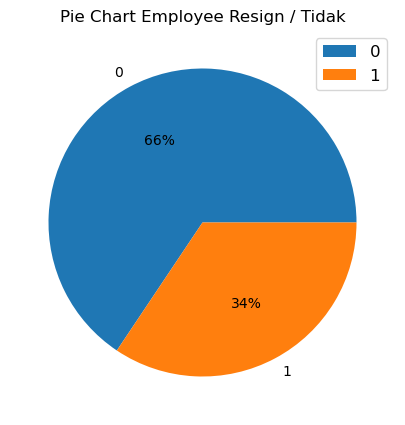

In [91]:
plt.figure(figsize=(7,5))


#sns.barplot(target["index"], target["percentage"])
plt.pie(target["percentage"], labels = target["index"], autopct='%.0f%%')
plt.title("Pie Chart Employee Resign / Tidak")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

| Value | Meaning |
| --- | --- |
| 0 | Tidak Resign |
| 1 | Resign |

Dari plot diatas ditemukan bahwa jumlah karyawan pada dataset ini adalah 4653. Karyawan yang stay /  tidak resign sebesar 3053 orang (66%), sedangkan sisanya 1600 orang (34%) memutuskan untuk resign.

## 4.2 EDA Kolom Numerical Joining Year

<Figure size 1000x500 with 0 Axes>

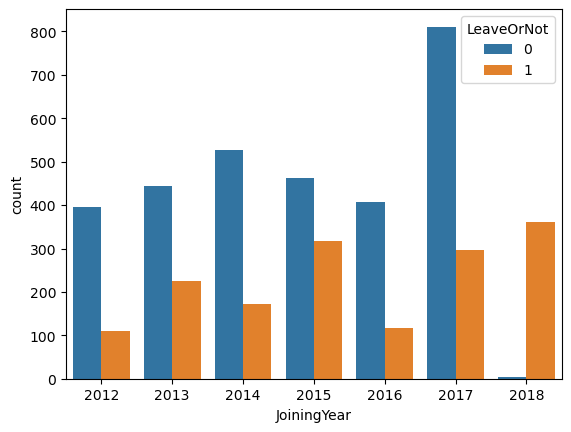

<Figure size 1000x500 with 0 Axes>

In [92]:
sns.countplot(x = 'JoiningYear' , hue = 'LeaveOrNot', data = df)
plt.figure(figsize = (10, 5))

In [93]:
# Menghitung value count untuk setiap kombinasi 'JoiningYear' dan 'LeaveOrNot'
value_counts = df.groupby(['JoiningYear', 'LeaveOrNot']).size().reset_index(name='Count')

# Menampilkan hasil value count
print(value_counts)

    JoiningYear  LeaveOrNot  Count
0          2012           0    395
1          2012           1    109
2          2013           0    445
3          2013           1    224
4          2014           0    526
5          2014           1    173
6          2015           0    463
7          2015           1    318
8          2016           0    408
9          2016           1    117
10         2017           0    811
11         2017           1    297
12         2018           0      5
13         2018           1    362


Dari plot di atas diketahui bahwa karywan yang bergabung pada 2018 mayoritas memutuskan untuk resign

## 4.3 EDA Kolom Categorial

### 4.3.1.1 EDA Kolom  Nominal Gender

In [94]:
target = df["Gender"].value_counts().reset_index()
persen = df["Gender"].value_counts(normalize=True).reset_index()
target["percentage"] = persen["Gender"]
target

,index,Gender,percentage
0,Male,2778,0.597034
1,Female,1875,0.402966


Text(0.5, 1.0, 'Gender Distribution Gender')

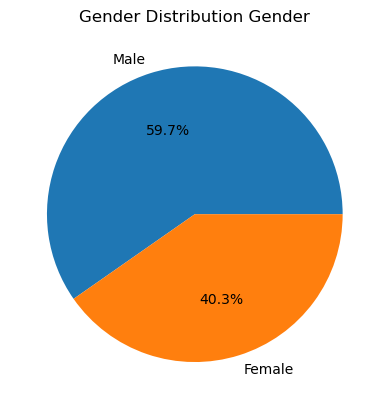

In [95]:
plt.pie(df['Gender'].value_counts(), labels = df['Gender'].value_counts().index, autopct = '%1.1f%%',)
plt.title("Gender Distribution Gender")

Diketahui pada dataset ini 2778 orang (59.7%) adalah laki-laki, sedangkan sisanya 1875 (40.3%) adalah perempuan

### 4.3.1.2 EDA Kolom Nominal PaymentTier

<Figure size 1400x1000 with 0 Axes>

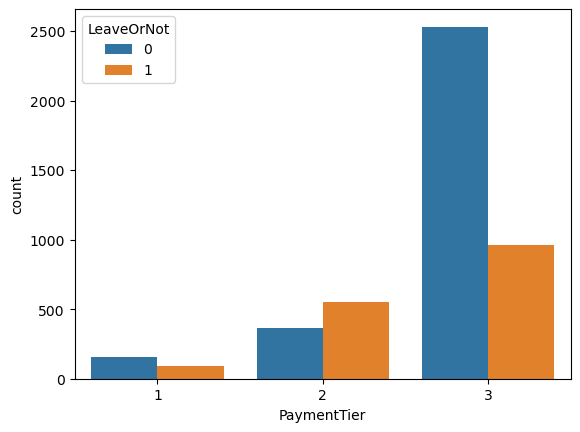

<Figure size 1400x1000 with 0 Axes>

In [96]:
sns.countplot(x="PaymentTier",hue="LeaveOrNot",data=df)
plt.figure(figsize=(14,10))

Dari grafik di atas diketahui bahwa mayoritas karyawan yang menerima payment di tier 2 memutuskan untuk resign

<Figure size 1400x1000 with 0 Axes>

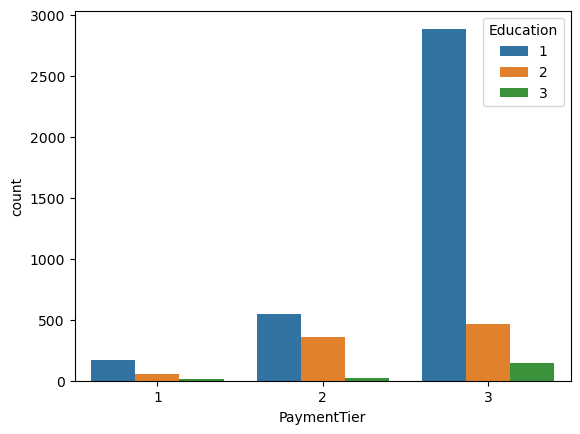

<Figure size 1400x1000 with 0 Axes>

In [97]:
sns.countplot(x="PaymentTier",hue="Education",data=df)
plt.figure(figsize=(14,10))

Dari grafik di atas diketahui bahwa karyawan yang bergelar Bachelor mayoritas memiliki payment pada tier 3 (paling rendah)

### 4.3.1.3 EDA Kolom Age

In [98]:
df['Age'].describe()

count    4653.000000
mean       29.393295
std         4.826087
min        22.000000
25%        26.000000
50%        28.000000
75%        32.000000
max        41.000000
Name: Age, dtype: float64

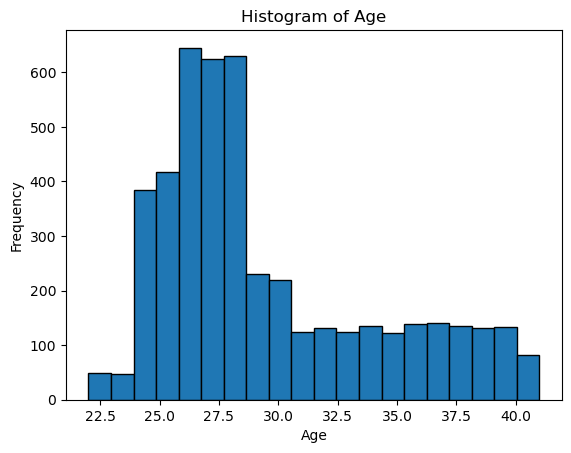

In [99]:
plt.hist(df['Age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [100]:
df['Age'].value_counts()

26    645
28    630
27    625
25    418
24    385
29    230
30    220
37    141
36    139
34    136
38    136
40    134
32    132
39    131
31    125
33    124
35    123
41     82
22     49
23     48
Name: Age, dtype: int64

Dapat dilihat pada dataset ini umur maksimal karyawan adalah 41 tahun dan umur yang paling kecil adalah 22, sedangkan rata-rata umur pada dataset ini adalah 29

### 4.3.2.1 EDA Kolom Ordinal Education

In [101]:
target = df["Education"].value_counts().reset_index()
persen = df["Education"].value_counts(normalize=True).reset_index()
target["percentage"] = persen["Education"]
target

,index,Education,percentage
0,1,3601,0.773909
1,2,873,0.187621
2,3,179,0.038470


| Value | Meaning |
| --- | --- |
| 1 | Bachelors |
| 2 | Masters |
| 3 | PHD |

Text(0.5, 1.0, 'Diagram from Degree Convention')

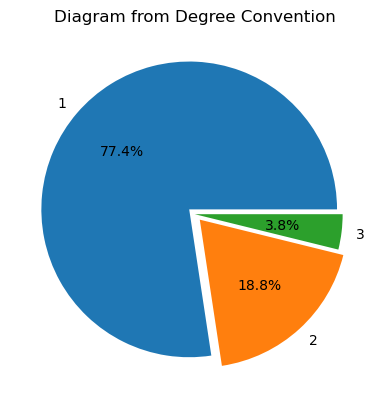

In [102]:
plt.pie(x = df['Education'].value_counts(), labels = df['Education'].value_counts().index, autopct = '%1.1f%%' ,  explode = [0.05, 0.05,0 ], startangle = 360)
plt.title("Diagram from Degree Convention")

Diketahui sebaran Education pada dataset ini Bachelor adalah 3601 (77%) orang, Master sebanyak 873 (18%) dan sisanya PHD sebanyak 179 (3.8%) orang

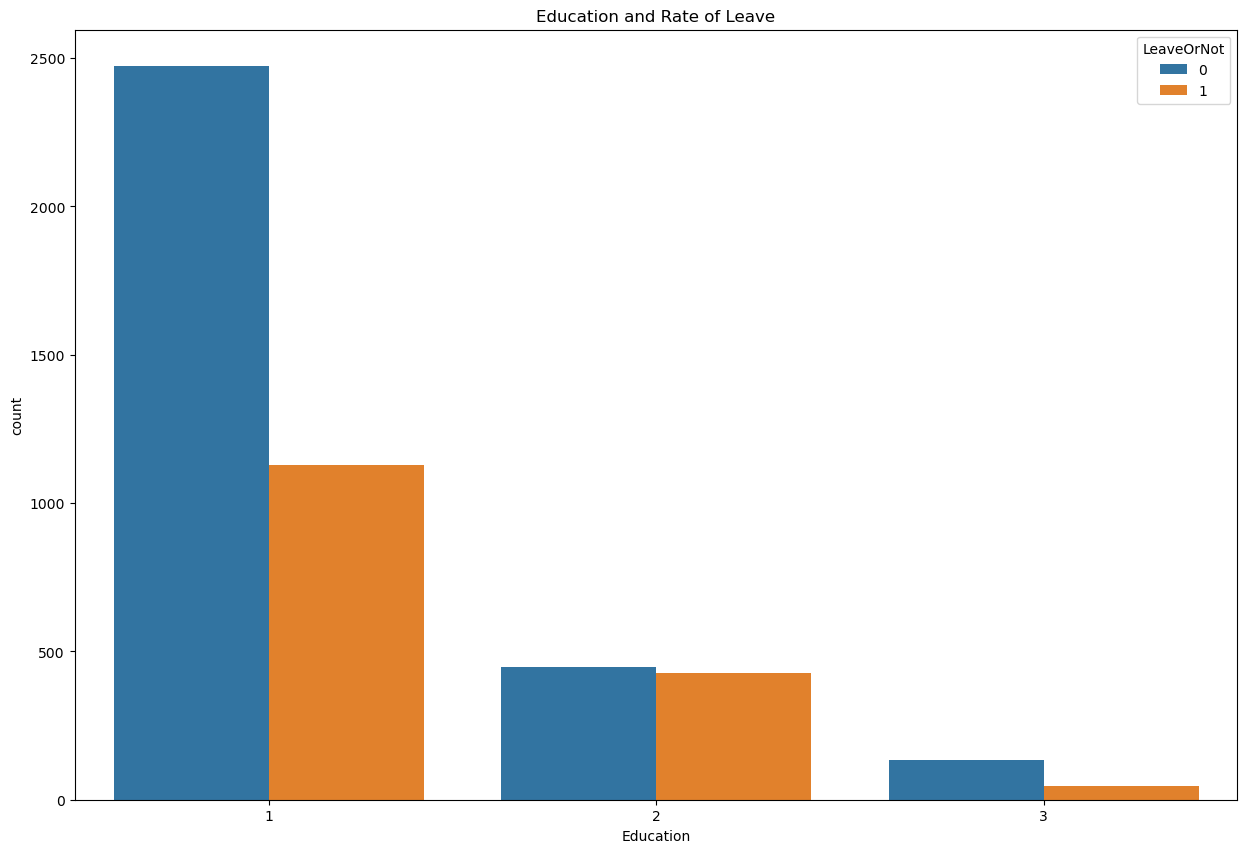

In [103]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'Education', hue = 'LeaveOrNot')
plt.title('Education and Rate of Leave')
plt.show()

In [104]:
# Menghitung value count untuk setiap kombinasi 'Education' dan 'LeaveOrNot'
value_counts = df.groupby(['Education', 'LeaveOrNot']).size().reset_index(name='Count')

# Menampilkan hasil value count
print(value_counts)


   Education  LeaveOrNot  Count
0          1           0   2472
1          1           1   1129
2          2           0    447
3          2           1    426
4          3           0    134
5          3           1     45


Dari Grafik di atas di ketahui bahwa seluruh karyawan dengan Education level baik itu Bachelors, Master, dan PHD mayoritas tetap akan stay (tidak resign)

# 5. Feature Engineering

## 5.1 Split Feature

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   int64 
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 327.3+ KB


In [106]:
# Define X (features) and y (target variable)
X = df[['Education', 'JoiningYear', 'PaymentTier', 'Age', 'EverBenched', 'ExperienceInCurrentDomain']]
y = df['LeaveOrNot']

## 5.2 Split Train Set and Test

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)
print('Train Size:' , X_train.shape)
print('Test Size:' , X_test.shape)
X_train

Train Size: (3722, 6)
Test Size: (931, 6)


,Education,JoiningYear,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain
1847,1,2016,3,26,Yes,4
2905,1,2012,3,26,No,4
4610,1,2015,3,24,No,2
2228,1,2012,3,28,No,1
5,1,2016,3,22,No,0
...,...,...,...,...,...,...
3335,1,2016,3,37,No,0
1099,2,2017,2,27,No,5
2514,1,2016,3,29,No,5
3606,1,2013,2,34,No,3


## 5.3 Handling Missing Value

In [108]:
# Check X_train

X_train.isnull().sum()

Education                    0
JoiningYear                  0
PaymentTier                  0
Age                          0
EverBenched                  0
ExperienceInCurrentDomain    0
dtype: int64

In [109]:
# Check X_test

X_test.isnull().sum()

Education                    0
JoiningYear                  0
PaymentTier                  0
Age                          0
EverBenched                  0
ExperienceInCurrentDomain    0
dtype: int64

In [110]:
# Check y_train

y_train.isnull().sum()

0

In [111]:
# Check y_test

y_test.isnull().sum()

0

## 5.4 - Split numerical column and categorical column

In [112]:
# Define X (features) and y (target variable)
X = df[['Education', 'JoiningYear', 'PaymentTier', 'Age', 'EverBenched', 'ExperienceInCurrentDomain']]
y = df['LeaveOrNot']

In [113]:
#Define kolom numerikal dan kategorial
num_col = ['JoiningYear']
cat_col = ['Education', 'Age', 'PaymentTier', 'EverBenched', 'ExperienceInCurrentDomain']

#Define kolom kategorial nominal dan ordinal
cat_col_n = ['Age', 'ExperienceInCurrentDomain', 'EverBenched']
cat_col_o = ['Education', 'PaymentTier']

In [114]:
X_train_num = X_train[num_col] # X_train Numerical Data
X_test_num = X_test[num_col] # X_test Numerical Data

X_train_cat_n = X_train[cat_col_n] # X_train Categorical Nominal Data
X_test_cat_n = X_test[cat_col_n] # X_test Categorical Nominal Data

X_train_cat_o = X_train[cat_col_o] # X_train Categorical Ordinal Data
X_test_cat_o = X_test[cat_col_o] # X_test Categorical Ordinal Data

## 5.5 Feature Scalling

Sebelum melakukan scalling pada kolom numerikal kita akan mengecek dahulu apakah data termasuk skew / normal

In [115]:
skew = df['JoiningYear'].skew()
print (skew)

-0.11346207232249321


Dari perhitungan di atas diketahui bahwa data pada kolom JoiningYear adalah data normal karena nilai skew berada diantara -0.5 sampai 0.5

Karena data normal maka kita akan menggunakan metode standart scaler

In [116]:
scaler = StandardScaler()
scaler.fit(X_train_num)

StandardScaler()

In [117]:
X_train_num_scaled = scaler.transform(X_train_num) # Scalling train
X_test_num_scaled = scaler.transform(X_test_num) # Scalling test

## 5.6 Feature Encoding

### 5.6.1 Feature Encoding Nominal

In [118]:
X_train_cat_n

,Age,ExperienceInCurrentDomain,EverBenched
1847,26,4,Yes
2905,26,4,No
4610,24,2,No
2228,28,1,No
5,22,0,No
...,...,...,...
3335,37,0,No
1099,27,5,No
2514,29,5,No
3606,34,3,No


In [119]:
encodern = OneHotEncoder()

encodern.fit(X_train_cat_n)

X_train_catn_encoded = encodern.transform(X_train_cat_n).toarray() # Encoding Nominal Train
X_test_catn_encoded = encodern.transform(X_test_cat_n).toarray() # Encoding Nominal Test

### 5.6.2 Feature Encoding Ordinal

In [120]:
X_train_cat_o['Education'].unique()

array([1, 3, 2], dtype=int64)

In [121]:
encoder = OrdinalEncoder(categories=[[1,2,3], [1,2,3]])

In [122]:
encoder.fit(X_train_cat_o)

OrdinalEncoder(categories=[[1, 2, 3], [1, 2, 3]])

In [123]:
X_train_cat_encoded_o = encoder.transform(X_train_cat_o)
X_test_cat_encoded_o = encoder.transform(X_test_cat_o)

## 5.7 Merge / Concat Data

In [124]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded_o, X_train_catn_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded_o, X_test_catn_encoded], axis=1)

## 5.8 Pipeline

In [125]:
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer_1 = Pipeline([
    ('encodern', OneHotEncoder())
])

categorical_transformer_2 = Pipeline([
    ('encoder', OrdinalEncoder(categories=[[1,2,3], [1,2,3]]))
])
# define preprocessing pipeline using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_col),
    ('cat', categorical_transformer_1, cat_col_n),
    ('cato', categorical_transformer_2, cat_col_o)
])



# 6. Model Definition

Dalam penelitian ini kita akan menggunakan 5 model yaitu:

## 6.1 Logistic Regression

In [126]:
log_model = LogisticRegression() 

In [127]:
# Define the pipeline with preprocessing and classification steps
pipeline_log = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

## 6.2 SVM

In [128]:
svc = SVC()

In [129]:
# Define the pipeline with preprocessing and classification steps
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

## 6.3 Decision Tree

In [130]:
dtr = DecisionTreeClassifier()

In [131]:
# Define the pipeline with preprocessing and classification steps
pipeline_dtr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

## 6.4 Random Forest

In [132]:
rf = RandomForestClassifier()

In [133]:
# Define the pipeline with preprocessing and classification steps
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

## 6.5 KNN

### 6.5.1 KNN Euclidean

In [134]:
cls_knn_euclidean = KNeighborsClassifier()

In [135]:
# Define the pipeline with preprocessing and classification steps
pipeline_cls = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

### 6.5.2 KNN Manhattan

In [136]:
cls_knn_manhattan = KNeighborsClassifier()

In [137]:
# Define the pipeline with preprocessing and classification steps
pipeline_cls1 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

## 6.6 Boosting

In [138]:
ada_clf = AdaBoostClassifier()

In [139]:
# Define the pipeline with preprocessing and classification steps
pipeline_ada = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier())
])

# 7. Model Training

## 7.1 Logistic Regression

In [140]:
log_model.fit(X_train_final, y_train)

LogisticRegression()

In [141]:
pipeline_log.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['JoiningYear']),
                                                 ('cat',
                                                  Pipeline(steps=[('encodern',
                                                                   OneHotEncoder())]),
                                                  ['Age',
                                                   'ExperienceInCurrentDomain',
                                                   'EverBenched']),
                                                 ('cato',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[[1,
                                                                                               2,
                                                                                               3],
                                                                                              [1,
                                                                                               2,
                                                                                               3]]))]),
                                                  ['Education',
                                                   'PaymentTier'])])),
                ('classifier', LogisticRegression())])

## 7.2 SVM

In [142]:
svc.fit(X_train_final, y_train)

SVC()

In [143]:
pipeline_svm.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['JoiningYear']),
                                                 ('cat',
                                                  Pipeline(steps=[('encodern',
                                                                   OneHotEncoder())]),
                                                  ['Age',
                                                   'ExperienceInCurrentDomain',
                                                   'EverBenched']),
                                                 ('cato',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[[1,
                                                                                               2,
                                                                                               3],
                                                                                              [1,
                                                                                               2,
                                                                                               3]]))]),
                                                  ['Education',
                                                   'PaymentTier'])])),
                ('classifier', SVC())])

## 7.3 Decision Tree

In [144]:
dtr.fit(X_train_final, y_train)

DecisionTreeClassifier()

In [145]:
pipeline_dtr.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['JoiningYear']),
                                                 ('cat',
                                                  Pipeline(steps=[('encodern',
                                                                   OneHotEncoder())]),
                                                  ['Age',
                                                   'ExperienceInCurrentDomain',
                                                   'EverBenched']),
                                                 ('cato',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[[1,
                                                                                               2,
                                                                                               3],
                                                                                              [1,
                                                                                               2,
                                                                                               3]]))]),
                                                  ['Education',
                                                   'PaymentTier'])])),
                ('classifier', DecisionTreeClassifier())])

## 7.4 Random Forest

In [146]:
rf.fit(X_train_final, y_train)

RandomForestClassifier()

In [147]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['JoiningYear']),
                                                 ('cat',
                                                  Pipeline(steps=[('encodern',
                                                                   OneHotEncoder())]),
                                                  ['Age',
                                                   'ExperienceInCurrentDomain',
                                                   'EverBenched']),
                                                 ('cato',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[[1,
                                                                                               2,
                                                                                               3],
                                                                                              [1,
                                                                                               2,
                                                                                               3]]))]),
                                                  ['Education',
                                                   'PaymentTier'])])),
                ('classifier', RandomForestClassifier())])

## 7.5 KNN

### 7.5.1 KNN Euclidean

In [148]:
cls_knn_euclidean.fit(X_train_final, y_train)

KNeighborsClassifier()

In [149]:
pipeline_cls.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['JoiningYear']),
                                                 ('cat',
                                                  Pipeline(steps=[('encodern',
                                                                   OneHotEncoder())]),
                                                  ['Age',
                                                   'ExperienceInCurrentDomain',
                                                   'EverBenched']),
                                                 ('cato',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[[1,
                                                                                               2,
                                                                                               3],
                                                                                              [1,
                                                                                               2,
                                                                                               3]]))]),
                                                  ['Education',
                                                   'PaymentTier'])])),
                ('classifier', KNeighborsClassifier())])

### 7.5.2 KNN Manhattan

In [150]:
cls_knn_manhattan.fit(X_train_final, y_train)

KNeighborsClassifier()

In [151]:
pipeline_cls1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['JoiningYear']),
                                                 ('cat',
                                                  Pipeline(steps=[('encodern',
                                                                   OneHotEncoder())]),
                                                  ['Age',
                                                   'ExperienceInCurrentDomain',
                                                   'EverBenched']),
                                                 ('cato',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[[1,
                                                                                               2,
                                                                                               3],
                                                                                              [1,
                                                                                               2,
                                                                                               3]]))]),
                                                  ['Education',
                                                   'PaymentTier'])])),
                ('classifier', KNeighborsClassifier())])

## 7.6 Boosting

In [152]:
ada_clf.fit(X_train_final, y_train)

AdaBoostClassifier()

In [153]:
pipeline_ada.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['JoiningYear']),
                                                 ('cat',
                                                  Pipeline(steps=[('encodern',
                                                                   OneHotEncoder())]),
                                                  ['Age',
                                                   'ExperienceInCurrentDomain',
                                                   'EverBenched']),
                                                 ('cato',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[[1,
                                                                                               2,
                                                                                               3],
                                                                                              [1,
                                                                                               2,
                                                                                               3]]))]),
                                                  ['Education',
                                                   'PaymentTier'])])),
                ('classifier', AdaBoostClassifier())])

# 8. Model Evaluation

 Metric yang di gunakan pada penelitian ini adalah precision, Precision dapat mengukur sejauh mana karyawan yang diprediksi berhenti benar-benar berhenti. Ini bermanfaat ketika menghindari kesalahan mengklasifikasikan karyawan yang sebenarnya tidak resign.

## 8.1 Logistic Regression

In [154]:
y_pred_train_log = log_model.predict(X_train_final)
y_pred_test_log = log_model.predict(X_test_final)

In [155]:
pre_score_train_cross_val_log = cross_val_score(log_model, 
                                           X_train_final, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision')

print('Precision Score - All - Cross Validation  : ', pre_score_train_cross_val_log)
print('Precision Score - Mean - Cross Validation : ', pre_score_train_cross_val_log.mean())
print('Precision Score - Std - Cross Validation  : ', pre_score_train_cross_val_log.std())
print('Precision Score - Range of Test-Set       : ', (pre_score_train_cross_val_log.mean()-pre_score_train_cross_val_log.std()) ,
                                         '-', (pre_score_train_cross_val_log.mean()+pre_score_train_cross_val_log.std()))

Precision Score - All - Cross Validation  :  [0.49122807 0.49565217 0.46428571 0.5625     0.5648855 ]
Precision Score - Mean - Cross Validation :  0.5157102909114805
Precision Score - Std - Cross Validation  :  0.04062923076046409
Precision Score - Range of Test-Set       :  0.47508106015101637 - 0.5563395216719446


In [156]:
print("Accuracy Score")
logistic_train_score = log_model.score(X_train_final, y_train)
logistic_test_score = log_model.score(X_test_final, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(logistic_train_score, logistic_test_score))
print("")
print("Precision Score")
train_precision_log = precision_score(y_train, y_pred_train_log)
test_precision_log = precision_score(y_test,y_pred_test_log)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_log, test_precision_log))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_log))

Accuracy Score
Train Score: 0.6577109081139173
Test Score: 0.677765843179377

Precision Score
Train Precision: 0.5260663507109005
Test Precision: 0.4782608695652174

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       638
           1       0.48      0.26      0.34       293

    accuracy                           0.68       931
   macro avg       0.60      0.57      0.56       931
weighted avg       0.64      0.68      0.65       931



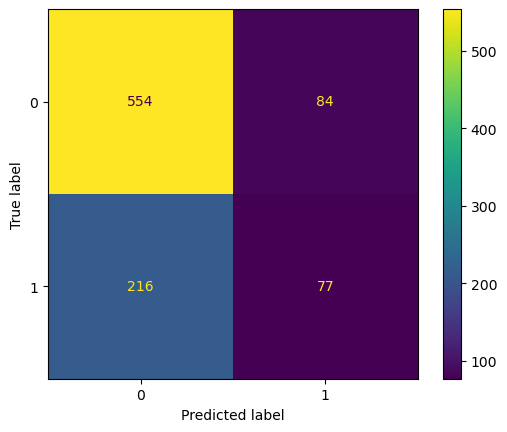

In [157]:
cm_log = confusion_matrix(y_test, y_pred_test_log, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log,display_labels=log_model.classes_)

disp.plot()
plt.show()

### 8.1.1 Pipeline Logistic Regression

In [158]:
y_pred_train_log_pipe = pipeline_log.predict(X_train)
y_pred_test_log_pipe = pipeline_log.predict(X_test)

In [159]:
pre_score_train_pipe_log = cross_val_score(pipeline_log, 
                                           X_train, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision')

print('Precision Score - All - Pipeline     : ', pre_score_train_pipe_log)
print('Precision Score - Mean - Pipeline    : ', pre_score_train_pipe_log.mean())
print('Precision Score - Std - Pipeline     : ', pre_score_train_pipe_log.std())
print('Precision Score - Range of Test-Set  : ', (pre_score_train_pipe_log.mean()-pre_score_train_pipe_log.std()) ,
                                         '-', (pre_score_train_pipe_log.mean()+pre_score_train_pipe_log.std()))

Precision Score - All - Pipeline     :  [0.49122807 0.49565217 0.46428571 0.5625     0.5648855 ]
Precision Score - Mean - Pipeline    :  0.5157102909114805
Precision Score - Std - Pipeline     :  0.04062923076046409
Precision Score - Range of Test-Set  :  0.47508106015101637 - 0.5563395216719446


In [160]:
print("Accuracy Score")
logpipe_train_score = pipeline_log.score(X_train, y_train)
logpipe_test_score = pipeline_log.score(X_test, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(logpipe_train_score, logpipe_test_score))
print("")
print("Precision Score")
train_precision_log_pipe = precision_score(y_train, y_pred_train_log_pipe)
test_precision_log_pipe = precision_score(y_test,y_pred_test_log_pipe)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_log_pipe, train_precision_log_pipe))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_log_pipe))

Accuracy Score
Train Score: 0.6577109081139173
Test Score: 0.677765843179377

Precision Score
Train Precision: 0.5260663507109005
Test Precision: 0.5260663507109005

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       638
           1       0.48      0.26      0.34       293

    accuracy                           0.68       931
   macro avg       0.60      0.57      0.56       931
weighted avg       0.64      0.68      0.65       931



## 8.2 SVM

In [161]:
y_pred_train_svc = svc.predict(X_train_final)
y_pred_test_svc = svc.predict(X_test_final)

In [162]:
pre_score_train_cross_val_svc = cross_val_score(svc, 
                                           X_train_final, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision')

print('Precision Score - All - Cross Validation  : ', pre_score_train_cross_val_svc)
print('Precision Score - Mean - Cross Validation : ', pre_score_train_cross_val_svc.mean())
print('Precision Score - Std - Cross Validation  : ', pre_score_train_cross_val_svc.std())
print('Precision Score - Range of Test-Set       : ', (pre_score_train_cross_val_svc.mean()-pre_score_train_cross_val_svc.std()) ,
                                         '-', (pre_score_train_cross_val_svc.mean()+pre_score_train_cross_val_svc.std()))

Precision Score - All - Cross Validation  :  [0.82312925 0.83928571 0.80113636 0.82638889 0.85057471]
Precision Score - Mean - Cross Validation :  0.8281029862310649
Precision Score - Std - Cross Validation  :  0.016642756945589445
Precision Score - Range of Test-Set       :  0.8114602292854755 - 0.8447457431766544


In [163]:
print("Accuracy Score")
svc_train_score = svc.score(X_train_final, y_train)
svc_test_score = svc.score(X_test_final, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(svc_train_score, svc_test_score))
print("")
print("Precision Score")
train_precision_svc = precision_score(y_train, y_pred_train_svc)
test_precision_svc = precision_score(y_test, y_pred_test_svc)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_svc, test_precision_svc))
print("")

print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_svc))

Accuracy Score
Train Score: 0.8092423428264374
Test Score: 0.8163265306122449

Precision Score
Train Precision: 0.8698884758364313
Test Precision: 0.824468085106383

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       638
           1       0.82      0.53      0.64       293

    accuracy                           0.82       931
   macro avg       0.82      0.74      0.76       931
weighted avg       0.82      0.82      0.80       931



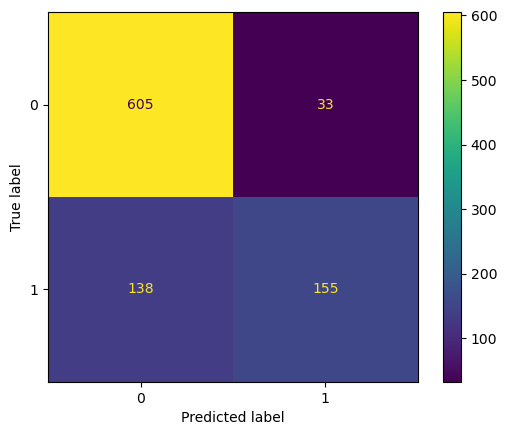

In [164]:
cm_svc = confusion_matrix(y_test, y_pred_test_svc, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc,display_labels=svc.classes_)

disp.plot()
plt.show()

### 8.2.1 Pipeline SVM

In [165]:
y_pred_train_svc_pipe = pipeline_svm.predict(X_train)
y_pred_test_svc_pipe = pipeline_svm.predict(X_test)

In [166]:
pre_score_train_pipe_svc = cross_val_score(pipeline_svm, 
                                           X_train, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision')

print('Precision Score - All - Pipeline     : ', pre_score_train_pipe_svc)
print('Precision Score - Mean - Pipeline    : ', pre_score_train_pipe_svc.mean())
print('Precision Score - Std - Pipeline     : ', pre_score_train_pipe_svc.std())
print('Precision Score - Range of Test-Set  : ', (pre_score_train_pipe_svc.mean()-pre_score_train_pipe_svc.std()) ,
                                         '-', (pre_score_train_pipe_svc.mean()+pre_score_train_pipe_svc.std()))

Precision Score - All - Pipeline     :  [0.82312925 0.83928571 0.78888889 0.82638889 0.85057471]
Precision Score - Mean - Pipeline    :  0.8256534912815701
Precision Score - Std - Pipeline     :  0.020810830653332564
Precision Score - Range of Test-Set  :  0.8048426606282375 - 0.8464643219349026


In [167]:
print("Accuracy Score")
svmpipe_train_score = pipeline_svm.score(X_train, y_train)
svmpipe_test_score = pipeline_svm.score(X_test, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(svmpipe_train_score, svmpipe_test_score))
print("")
print("Precision Score")
train_precision_svm_pipe = precision_score(y_train, y_pred_train_svc_pipe)
test_precision_svm_pipe = precision_score(y_test,y_pred_test_svc_pipe)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_svm_pipe, test_precision_svm_pipe))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_svc_pipe))

Accuracy Score
Train Score: 0.8092423428264374
Test Score: 0.8163265306122449

Precision Score
Train Precision: 0.8698884758364313
Test Precision: 0.824468085106383

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       638
           1       0.82      0.53      0.64       293

    accuracy                           0.82       931
   macro avg       0.82      0.74      0.76       931
weighted avg       0.82      0.82      0.80       931



## 8.3 Decision Tree

In [168]:
y_pred_train_dtr = dtr.predict(X_train_final)
y_pred_test_dtr = dtr.predict(X_test_final)

In [169]:
pre_score_train_cross_val_dtr = cross_val_score(dtr, 
                                           X_train_final, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision')

print('Precision Score - All - Cross Validation  : ', pre_score_train_cross_val_dtr)
print('Precision Score - Mean - Cross Validation : ', pre_score_train_cross_val_dtr.mean())
print('Precision Score - Std - Cross Validation  : ', pre_score_train_cross_val_dtr.std())
print('Precision Score - Range of Test-Set       : ', (pre_score_train_cross_val_dtr.mean()-pre_score_train_cross_val_dtr.std()) ,
                                         '-', (pre_score_train_cross_val_dtr.mean()+pre_score_train_cross_val_dtr.std()))

Precision Score - All - Cross Validation  :  [0.71134021 0.7239819  0.69469027 0.6937799  0.75714286]
Precision Score - Mean - Cross Validation :  0.7161870267147717
Precision Score - Std - Cross Validation  :  0.023348754355685866
Precision Score - Range of Test-Set       :  0.6928382723590859 - 0.7395357810704576


In [170]:
print("Accuracy Score")
dtr_train_score = dtr.score(X_train_final, y_train)
dtr_test_score = dtr.score(X_test_final, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(dtr_train_score, dtr_test_score))
print("")
print("Precision Score")
train_precision_dtr = precision_score(y_train, y_pred_train_svc)
test_precison_dtr = precision_score(y_test, y_pred_test_svc)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_dtr, test_precison_dtr))
print("")

print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_dtr))

Accuracy Score
Train Score: 0.8729177861364857
Test Score: 0.7969924812030075

Precision Score
Train Precision: 0.8698884758364313
Test Precision: 0.824468085106383

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       638
           1       0.73      0.57      0.64       293

    accuracy                           0.80       931
   macro avg       0.77      0.74      0.75       931
weighted avg       0.79      0.80      0.79       931



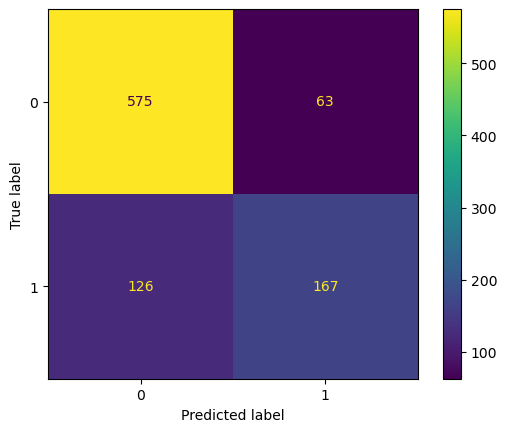

In [171]:
cm_dtr = confusion_matrix(y_test, y_pred_test_dtr, labels=dtr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtr,display_labels=dtr.classes_)

disp.plot()
plt.show()

### 8.3.1 Decision Tree Pipeline

In [172]:
y_pred_train_dtr_pipe = pipeline_dtr.predict(X_train)
y_pred_test_dtr_pipe = pipeline_dtr.predict(X_test)

In [173]:
pre_score_train_pipe_dtr = cross_val_score(pipeline_dtr, 
                                           X_train, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision')

print('Precision Score - All - Pipeline     : ', pre_score_train_pipe_dtr)
print('Precision Score - Mean - Pipeline    : ', pre_score_train_pipe_dtr.mean())
print('Precision Score - Std - Pipeline     : ', pre_score_train_pipe_dtr.std())
print('Precision Score - Range of Test-Set  : ', (pre_score_train_pipe_dtr.mean()-pre_score_train_pipe_dtr.std()) ,
                                         '-', (pre_score_train_pipe_dtr.mean()+pre_score_train_pipe_dtr.std()))

Precision Score - All - Pipeline     :  [0.70833333 0.71818182 0.69603524 0.70243902 0.74881517]
Precision Score - Mean - Pipeline    :  0.7147609168145842
Precision Score - Std - Pipeline     :  0.01852127530194558
Precision Score - Range of Test-Set  :  0.6962396415126386 - 0.7332821921165298


In [174]:
print("Accuracy Score")
dtrpipe_train_score = pipeline_dtr.score(X_train, y_train)
dtrpipe_test_score = pipeline_dtr.score(X_test, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(dtrpipe_train_score, dtrpipe_test_score))
print("")
print("Precision Score")
train_precision_dtr_pipe = precision_score(y_train, y_pred_train_dtr_pipe)
test_precision_dtr_pipe = precision_score(y_test,y_pred_test_dtr_pipe)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_dtr_pipe, test_precision_dtr_pipe))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_dtr_pipe))

Accuracy Score
Train Score: 0.8729177861364857
Test Score: 0.799140708915145

Precision Score
Train Precision: 0.9316770186335404
Test Precision: 0.7366071428571429

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       638
           1       0.74      0.56      0.64       293

    accuracy                           0.80       931
   macro avg       0.78      0.74      0.75       931
weighted avg       0.79      0.80      0.79       931



## 8.4 Random Forest

In [175]:
y_pred_train_rf = rf.predict(X_train_final)
y_pred_test_rf = rf.predict(X_test_final)

In [176]:
pre_score_train_cross_val_rf = cross_val_score(rf, 
                                           X_train_final, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision')

print('Precision Score - All - Cross Validation  : ', pre_score_train_cross_val_rf)
print('Precision Score - Mean - Cross Validation : ', pre_score_train_cross_val_rf.mean())
print('Precision Score - Std - Cross Validation  : ', pre_score_train_cross_val_rf.std())
print('Precision Score - Range of Test-Set       : ', (pre_score_train_cross_val_rf.mean()-pre_score_train_cross_val_rf.std()) ,
                                         '-', (pre_score_train_cross_val_rf.mean()+pre_score_train_cross_val_rf.std()))

Precision Score - All - Cross Validation  :  [0.70707071 0.74193548 0.69491525 0.70243902 0.76525822]
Precision Score - Mean - Cross Validation :  0.7223237371063296
Precision Score - Std - Cross Validation  :  0.02685990224873354
Precision Score - Range of Test-Set       :  0.695463834857596 - 0.7491836393550632


In [177]:
print("Accuracy Score")
rf_train_score = rf.score(X_train_final, y_train)
rf_test_score = rf.score(X_test_final, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(rf_train_score, rf_test_score))
print("")
print("Precision Score")
train_precision_rf = precision_score(y_train, y_pred_train_rf)
test_precison_rf = precision_score(y_test, y_pred_test_rf)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_rf, test_precison_rf))
print("")

print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_rf))

Accuracy Score
Train Score: 0.8729177861364857
Test Score: 0.7959183673469388

Precision Score
Train Precision: 0.8804744525547445
Test Precision: 0.6973180076628352

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       638
           1       0.70      0.62      0.66       293

    accuracy                           0.80       931
   macro avg       0.77      0.75      0.76       931
weighted avg       0.79      0.80      0.79       931



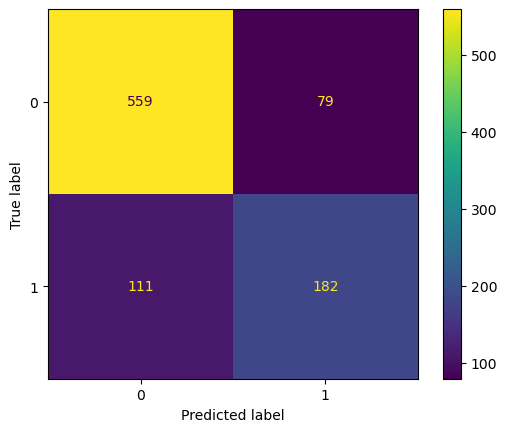

In [178]:
cm_rf = confusion_matrix(y_test, y_pred_test_rf, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf,display_labels=log_model.classes_)

disp.plot()
plt.show()

### 8.4.1 Pipeline RandomForest

In [179]:
y_pred_train_rf_pipe = pipeline_rf.predict(X_train)
y_pred_test_rf_pipe = pipeline_rf.predict(X_test)

In [180]:
pre_score_train_pipe_rf = cross_val_score(pipeline_rf,
                                           X_train, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision')

print('Precision Score - All - Pipeline     : ', pre_score_train_pipe_rf)
print('Precision Score - Mean - Pipeline    : ', pre_score_train_pipe_rf.mean())
print('Precision Score - Std - Pipeline     : ', pre_score_train_pipe_rf.std())
print('Precision Score - Range of Test-Set  : ', (pre_score_train_pipe_rf.mean()-pre_score_train_pipe_rf.std()) ,
                                         '-', (pre_score_train_pipe_rf.mean()+pre_score_train_pipe_rf.std()))

Precision Score - All - Pipeline     :  [0.72486772 0.76923077 0.70353982 0.69953052 0.76995305]
Precision Score - Mean - Pipeline    :  0.7334243770364923
Precision Score - Std - Pipeline     :  0.03076211450125879
Precision Score - Range of Test-Set  :  0.7026622625352336 - 0.7641864915377511


In [181]:
print("Accuracy Score")
rfpipe_train_score = pipeline_rf.score(X_train, y_train)
rfpipe_test_score = pipeline_rf.score(X_test, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(rfpipe_train_score, rfpipe_test_score))
print("")
print("Precision Score")
train_precision_rf_pipe = precision_score(y_train, y_pred_train_rf_pipe)
test_precision_rf_pipe = precision_score(y_test,y_pred_test_rf_pipe)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_rf_pipe, test_precision_rf_pipe))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_rf_pipe))

Accuracy Score
Train Score: 0.8729177861364857
Test Score: 0.8012889366272825

Precision Score
Train Precision: 0.8994252873563219
Test Precision: 0.7288135593220338

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       638
           1       0.73      0.59      0.65       293

    accuracy                           0.80       931
   macro avg       0.78      0.74      0.76       931
weighted avg       0.80      0.80      0.79       931



## 8.5 KNN

### 8.5.1 KNN Euclidean

In [182]:
y_pred_train_knn_euc = cls_knn_euclidean.predict(X_train_final)
y_pred_test_knn_euc = cls_knn_euclidean.predict(X_test_final)

In [183]:
pre_score_train_cross_val_euc = cross_val_score(cls_knn_euclidean, 
                                           X_train_final, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision')

print('Precision Score - All - Cross Validation  : ', pre_score_train_cross_val_euc)
print('Precision Score - Mean - Cross Validation : ', pre_score_train_cross_val_euc.mean())
print('Precision Score - Std - Cross Validation  : ', pre_score_train_cross_val_euc.std())
print('Precision Score - Range of Test-Set       : ', (pre_score_train_cross_val_euc.mean()-pre_score_train_cross_val_euc.std()) ,
                                         '-', (pre_score_train_cross_val_euc.mean()+pre_score_train_cross_val_euc.std()))

Precision Score - All - Cross Validation  :  [0.71098266 0.65829146 0.64039409 0.61458333 0.69312169]
Precision Score - Mean - Cross Validation :  0.6634746462741894
Precision Score - Std - Cross Validation  :  0.03488809746769059
Precision Score - Range of Test-Set       :  0.6285865488064988 - 0.69836274374188


In [184]:
print("Accuracy Score")
knn_euc_train_score = cls_knn_euclidean.score(X_train_final, y_train)
knn_euc_test_score = cls_knn_euclidean.score(X_test_final, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(knn_euc_train_score, knn_euc_test_score))
print("")
print("Precision Score")
train_precision_euc = precision_score(y_train, y_pred_train_knn_euc)
test_precison_euc = precision_score(y_test, y_pred_test_knn_euc)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_euc, test_precison_euc))
print("")

print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_knn_euc))

Accuracy Score
Train Score: 0.7966147232670607
Test Score: 0.7508055853920516

Precision Score
Train Precision: 0.7976190476190477
Test Precision: 0.639269406392694

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       638
           1       0.64      0.48      0.55       293

    accuracy                           0.75       931
   macro avg       0.71      0.68      0.69       931
weighted avg       0.74      0.75      0.74       931



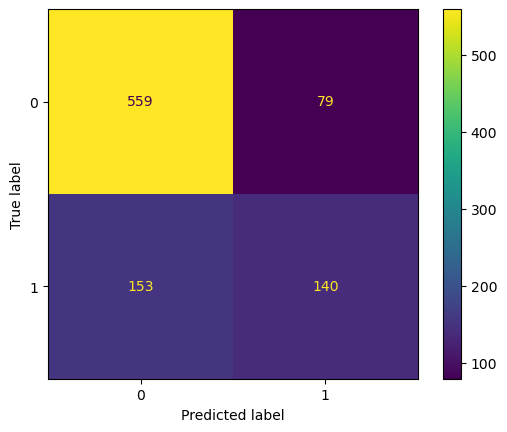

In [185]:
cm_euc = confusion_matrix(y_test, y_pred_test_knn_euc, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_euc,display_labels=log_model.classes_)

disp.plot()
plt.show()

#### 8.5.1.1 Pipeline Euclidean

In [186]:
y_pred_train_eu_pipe = pipeline_cls.predict(X_train)
y_pred_test_eu_pipe = pipeline_cls.predict(X_test)

In [187]:
pre_score_train_pipe_cls = cross_val_score(pipeline_cls,
                                           X_train, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision')

print('Precision Score - All - Pipeline     : ', pre_score_train_pipe_cls)
print('Precision Score - Mean - Pipeline    : ', pre_score_train_pipe_cls.mean())
print('Precision Score - Std - Pipeline     : ', pre_score_train_pipe_cls.std())
print('Precision Score - Range of Test-Set  : ', (pre_score_train_pipe_cls.mean()-pre_score_train_pipe_cls.std()) ,
                                         '-', (pre_score_train_pipe_cls.mean()+pre_score_train_pipe_cls.std()))

Precision Score - All - Pipeline     :  [0.70053476 0.63902439 0.63592233 0.59685864 0.67692308]
Precision Score - Mean - Pipeline    :  0.6498526390731623
Precision Score - Std - Pipeline     :  0.03583616741172072
Precision Score - Range of Test-Set  :  0.6140164716614416 - 0.685688806484883


In [188]:
print("Accuracy Score")
clspipe_train_score = pipeline_cls.score(X_train, y_train)
clspipe_test_score = pipeline_cls.score(X_test, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(clspipe_train_score, clspipe_test_score))
print("")
print("Precision Score")
train_precision_cls_pipe = precision_score(y_train, y_pred_train_eu_pipe)
test_precision_cls_pipe = precision_score(y_test,y_pred_test_eu_pipe)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_cls_pipe, test_precision_cls_pipe))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_eu_pipe))

Accuracy Score
Train Score: 0.7966147232670607
Test Score: 0.7518796992481203

Precision Score
Train Precision: 0.7963362068965517
Test Precision: 0.6409090909090909

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       638
           1       0.64      0.48      0.55       293

    accuracy                           0.75       931
   macro avg       0.71      0.68      0.69       931
weighted avg       0.74      0.75      0.74       931



### 8.5.2 KNN Manhattan

In [189]:
y_pred_train_knn_man = cls_knn_manhattan.predict(X_train_final)
y_pred_test_knn_man = cls_knn_manhattan.predict(X_test_final)

In [190]:
pre_score_train_cross_val_man = cross_val_score(cls_knn_manhattan, 
                                           X_train_final, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision')

print('Precision Score - All - Cross Validation  : ', pre_score_train_cross_val_man)
print('Precision Score - Mean - Cross Validation : ', pre_score_train_cross_val_man.mean())
print('Precision Score - Std - Cross Validation  : ', pre_score_train_cross_val_man.std())
print('Precision Score - Range of Test-Set       : ', (pre_score_train_cross_val_man.mean()-pre_score_train_cross_val_man.std()) ,
                                         '-', (pre_score_train_cross_val_man.mean()+pre_score_train_cross_val_man.std()))

Precision Score - All - Cross Validation  :  [0.71098266 0.65829146 0.64039409 0.61458333 0.69312169]
Precision Score - Mean - Cross Validation :  0.6634746462741894
Precision Score - Std - Cross Validation  :  0.03488809746769059
Precision Score - Range of Test-Set       :  0.6285865488064988 - 0.69836274374188


In [191]:
print("Accuracy Score")
knn_man_train_score = cls_knn_manhattan.score(X_train_final, y_train)
knn_man_test_score = cls_knn_manhattan.score(X_test_final, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(knn_man_train_score, knn_man_test_score))
print("")
print("Precision Score")
train_precision_man = precision_score(y_train, y_pred_train_knn_man)
test_precison_man = precision_score(y_test, y_pred_test_knn_man)

print('Train Precision: {0}\nTest Precision: {1}'.format(y_pred_train_knn_man, y_pred_test_knn_man))
print("")

print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_knn_man))

Accuracy Score
Train Score: 0.7966147232670607
Test Score: 0.7508055853920516

Precision Score
Train Precision: [0 0 1 ... 0 1 0]
Test Precision: [0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 1 0 0 0 1 0 0 1 0 0 

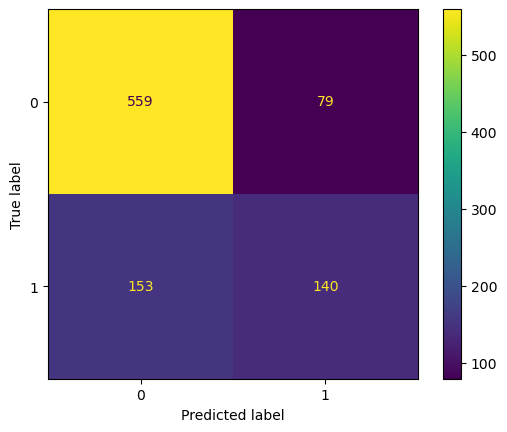

In [192]:
cm_man = confusion_matrix(y_test, y_pred_test_knn_man, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_man,display_labels=log_model.classes_)

disp.plot()
plt.show()

#### 8.5.2.1 Pipeline KNN Manhattan

In [193]:
y_pred_train_mht_pipe = pipeline_cls1.predict(X_train)
y_pred_test_mht_pipe = pipeline_cls1.predict(X_test)

In [194]:
pre_score_train_pipe_mht = cross_val_score(pipeline_cls1,
                                           X_train, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision')

print('Precision Score - All - Pipeline     : ', pre_score_train_pipe_mht)
print('Precision Score - Mean - Pipeline    : ', pre_score_train_pipe_mht.mean())
print('Precision Score - Std - Pipeline     : ', pre_score_train_pipe_mht.std())
print('Precision Score - Range of Test-Set  : ', (pre_score_train_pipe_mht.mean()-pre_score_train_pipe_mht.std()) ,
                                         '-', (pre_score_train_pipe_mht.mean()+pre_score_train_pipe_mht.std()))

Precision Score - All - Pipeline     :  [0.70053476 0.63902439 0.63592233 0.59685864 0.67692308]
Precision Score - Mean - Pipeline    :  0.6498526390731623
Precision Score - Std - Pipeline     :  0.03583616741172072
Precision Score - Range of Test-Set  :  0.6140164716614416 - 0.685688806484883


In [195]:
print("Accuracy Score")
mhtpipe_train_score = pipeline_cls1.score(X_train, y_train)
mhtpipe_test_score = pipeline_cls1.score(X_test, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(mhtpipe_train_score, mhtpipe_test_score))
print("")
print("Precision Score")
train_precision_mht_pipe = precision_score(y_train, y_pred_train_mht_pipe)
test_precision_mht_pipe = precision_score(y_test,y_pred_test_mht_pipe)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_mht_pipe, test_precision_mht_pipe))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_mht_pipe))

Accuracy Score


Train Score: 0.7966147232670607
Test Score: 0.7518796992481203

Precision Score
Train Precision: 0.7963362068965517
Test Precision: 0.6409090909090909

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       638
           1       0.64      0.48      0.55       293

    accuracy                           0.75       931
   macro avg       0.71      0.68      0.69       931
weighted avg       0.74      0.75      0.74       931



## 8.6 Boosting

In [196]:
y_train_pred_ada_clf = ada_clf.predict(X_train_final)
y_test_pred_ada_clf = ada_clf.predict(X_test_final)

In [197]:
pre_score_train_cross_ada_clf = cross_val_score(ada_clf, 
                                           X_train_final, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision')

print('Precision Score - All - Cross Validation  : ', pre_score_train_cross_ada_clf)
print('Precision Score - Mean - Cross Validation : ', pre_score_train_cross_ada_clf.mean())
print('Precision Score - Std - Cross Validation  : ', pre_score_train_cross_ada_clf.std())
print('Precision Score - Range of Test-Set       : ', (pre_score_train_cross_ada_clf.mean()-pre_score_train_cross_ada_clf.std()) ,
                                         '-', (pre_score_train_cross_ada_clf.mean()+pre_score_train_cross_ada_clf.std()))

Precision Score - All - Cross Validation  :  [0.81456954 0.83636364 0.71859296 0.77777778 0.81818182]
Precision Score - Mean - Cross Validation :  0.7930971467142388
Precision Score - Std - Cross Validation  :  0.04182786050657163
Precision Score - Range of Test-Set       :  0.7512692862076672 - 0.8349250072208104


In [198]:
print("Accuracy Score")
ada_clf_train_score = ada_clf.score(X_train_final, y_train)
ada_clf_test_score = ada_clf.score(X_test_final, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(ada_clf_train_score, ada_clf_test_score))
print("")
print("Precision Score")
train_precision_man = precision_score(y_train, y_train_pred_ada_clf)
test_precison_man = precision_score(y_test, y_test_pred_ada_clf)

print('Train Precision: {0}\nTest Precision: {1}'.format(y_train_pred_ada_clf, y_test_pred_ada_clf))
print("")

print("TEST PERFORMANCE")
print(classification_report(y_test,y_test_pred_ada_clf))

Accuracy Score
Train Score: 0.7858678130037614
Test Score: 0.799140708915145

Precision Score
Train Precision: [0 0 0 ... 0 1 0]
Test Precision: [0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0

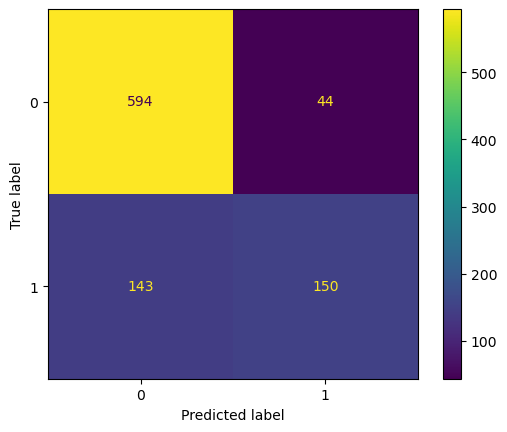

In [199]:
cm_ada = confusion_matrix(y_test, y_test_pred_ada_clf, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ada,display_labels=log_model.classes_)

disp.plot()
plt.show()

### 8.6.1 Pipeline Boosting

In [200]:
y_pred_train_boos_pipe = pipeline_ada.predict(X_train)
y_pred_test_boos_pipe = pipeline_ada.predict(X_test)

In [201]:
pre_score_train_pipe_boos = cross_val_score(pipeline_ada,
                                           X_train, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision')

print('Precision Score - All - Pipeline     : ', pre_score_train_pipe_boos)
print('Precision Score - Mean - Pipeline    : ', pre_score_train_pipe_boos.mean())
print('Precision Score - Std - Pipeline     : ', pre_score_train_pipe_boos.std())
print('Precision Score - Range of Test-Set  : ', (pre_score_train_pipe_boos.mean()-pre_score_train_pipe_boos.std()) ,
                                         '-', (pre_score_train_pipe_boos.mean()+pre_score_train_pipe_boos.std()))

Precision Score - All - Pipeline     :  [0.81456954 0.83636364 0.71859296 0.77777778 0.81818182]
Precision Score - Mean - Pipeline    :  0.7930971467142388
Precision Score - Std - Pipeline     :  0.04182786050657163
Precision Score - Range of Test-Set  :  0.7512692862076672 - 0.8349250072208104


In [202]:
print("Accuracy Score")
boospipe_train_score = pipeline_ada.score(X_train, y_train)
boospipe_test_score = pipeline_ada.score(X_test, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(boospipe_train_score, boospipe_test_score))
print("")
print("Precision Score")
train_precision_boss_pipe = precision_score(y_train, y_pred_train_boos_pipe)
test_precision_boss_pipe = precision_score(y_test,y_pred_test_boos_pipe)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_boss_pipe, test_precision_boss_pipe))
print("")
print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_boos_pipe))

Accuracy Score
Train Score: 0.7858678130037614
Test Score: 0.799140708915145

Precision Score
Train Precision: 0.793778801843318
Test Precision: 0.7731958762886598

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       638
           1       0.77      0.51      0.62       293

    accuracy                           0.80       931
   macro avg       0.79      0.72      0.74       931
weighted avg       0.80      0.80      0.79       931



Agar lebih mudah akan kita jadikan dataframe seluruh hasil baseline model di atas

In [203]:
all_reports = {}

logistic = {
    'Cross Validation Precision Mean' : pre_score_train_cross_val_log.mean(),
    'train - precision' : precision_score(y_train, y_pred_train_log),
    'train - recall' : recall_score(y_train, y_pred_train_log),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_log),
    'train - f1_score' : f1_score(y_train, y_pred_train_log),
    'test - precision' : precision_score(y_test, y_pred_test_log),
    'test - recall' : recall_score(y_test, y_pred_test_log),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_log),
    'test - f1_score' : f1_score(y_test, y_pred_test_log)
}

logistic_pipe = {
    'Cross Validation Precision Mean' : pre_score_train_pipe_log.mean(),
    'train - precision' : precision_score(y_train, y_pred_train_log_pipe),
    'train - recall' : recall_score(y_train, y_pred_train_log_pipe),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_log_pipe),
    'train - f1_score' : f1_score(y_train, y_pred_train_log_pipe),
    'test - precision' : precision_score(y_test, y_pred_test_log_pipe),
    'test - recall' : recall_score(y_test, y_pred_test_log_pipe),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_log_pipe),
    'test - f1_score' : f1_score(y_test, y_pred_test_log_pipe)
}

decisiontree = {
    'Cross Validation Precision Mean' : pre_score_train_cross_val_dtr.mean(),
    'train - precision' : precision_score(y_train, y_pred_train_dtr),
    'train - recall' : recall_score(y_train, y_pred_train_dtr),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_dtr),
    'train - f1_score' : f1_score(y_train, y_pred_train_dtr),
    'test - precision' : precision_score(y_test, y_pred_test_dtr),
    'test - recall' : recall_score(y_test, y_pred_test_dtr),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_dtr),
    'test - f1_score' : f1_score(y_test, y_pred_test_dtr)
}

decisiontree_pipe = {
    'Cross Validation Precision Mean' : pre_score_train_pipe_dtr.mean(),
    'train - precision' : precision_score(y_train, y_pred_train_dtr_pipe),
    'train - recall' : recall_score(y_train, y_pred_train_dtr_pipe),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_dtr_pipe),
    'train - f1_score' : f1_score(y_train, y_pred_train_dtr_pipe),
    'test - precision' : precision_score(y_test, y_pred_test_dtr_pipe),
    'test - recall' : recall_score(y_test, y_pred_test_dtr_pipe),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_dtr_pipe),
    'test - f1_score' : f1_score(y_test, y_pred_test_dtr_pipe)
}

euclidean = {
    'Cross Validation Precision Mean' : pre_score_train_cross_val_euc.mean(),
    'train - precision' : precision_score(y_train, y_pred_train_knn_euc),
    'train - recall' : recall_score(y_train, y_pred_train_knn_euc),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_knn_euc),
    'train - f1_score' : f1_score(y_train, y_pred_train_knn_euc),
    'test - precision' : precision_score(y_test, y_pred_test_knn_euc),
    'test - recall' : recall_score(y_test, y_pred_test_knn_euc),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_knn_euc),
    'test - f1_score' : f1_score(y_test, y_pred_test_knn_euc)
}

euclidean_pipe = {
    'Cross Validation Precision Mean' : pre_score_train_pipe_cls.mean(),
    'train - precision' : precision_score(y_train, y_pred_train_eu_pipe),
    'train - recall' : recall_score(y_train, y_pred_train_eu_pipe),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_eu_pipe),
    'train - f1_score' : f1_score(y_train, y_pred_train_eu_pipe),
    'test - precision' : precision_score(y_test, y_pred_test_eu_pipe),
    'test - recall' : recall_score(y_test, y_pred_test_eu_pipe),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_eu_pipe),
    'test - f1_score' : f1_score(y_test, y_pred_test_eu_pipe)
}

manhattan = {
    'Cross Validation Precision Mean' : pre_score_train_cross_val_man.mean(),
    'train - precision' : precision_score(y_train, y_pred_train_knn_man),
    'train - recall' : recall_score(y_train, y_pred_train_knn_man),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_knn_man),
    'train - f1_score' : f1_score(y_train, y_pred_train_knn_man),
    'test - precision' : precision_score(y_test, y_pred_test_knn_man),
    'test - recall' : recall_score(y_test, y_pred_test_knn_man),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_knn_man),
    'test - f1_score' : f1_score(y_test, y_pred_test_knn_man)
}

manhattan_pipe = {
    'Cross Validation Precision Mean' : pre_score_train_pipe_mht.mean(),
    'train - precision' : precision_score(y_train, y_pred_train_mht_pipe),
    'train - recall' : recall_score(y_train, y_pred_train_mht_pipe),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_mht_pipe),
    'train - f1_score' : f1_score(y_train, y_pred_train_mht_pipe),
    'test - precision' : precision_score(y_test, y_pred_test_mht_pipe),
    'test - recall' : recall_score(y_test, y_pred_test_mht_pipe),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_mht_pipe),
    'test - f1_score' : f1_score(y_test, y_pred_test_mht_pipe)
}

randomf = {
    'Cross Validation Precision Mean' : pre_score_train_cross_val_rf.mean(),
    'train - precision' : precision_score(y_train, y_pred_train_rf),
    'train - recall' : recall_score(y_train, y_pred_train_rf),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_rf),
    'train - f1_score' : f1_score(y_train, y_pred_train_rf),
    'test - precision' : precision_score(y_test, y_pred_test_rf),
    'test - recall' : recall_score(y_test, y_pred_test_rf),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_rf),
    'test - f1_score' : f1_score(y_test, y_pred_test_rf)
}

randomf_pipe = {
    'Cross Validation Precision Mean' : pre_score_train_pipe_rf.mean(),
    'train - precision' : precision_score(y_train, y_pred_train_rf_pipe),
    'train - recall' : recall_score(y_train, y_pred_train_rf_pipe),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_rf_pipe),
    'train - f1_score' : f1_score(y_train, y_pred_train_rf_pipe),
    'test - precision' : precision_score(y_test, y_pred_test_rf_pipe),
    'test - recall' : recall_score(y_test, y_pred_test_rf_pipe),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_rf_pipe),
    'test - f1_score' : f1_score(y_test, y_pred_test_rf_pipe)
}

svca = {
    'Cross Validation Precision Mean' : pre_score_train_cross_val_svc.mean(),
    'train - precision' : precision_score(y_train, y_pred_train_svc),
    'train - recall' : recall_score(y_train, y_pred_train_svc),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_svc),
    'train - f1_score' : f1_score(y_train, y_pred_train_svc),
    'test - precision' : precision_score(y_test, y_pred_test_svc),
    'test - recall' : recall_score(y_test, y_pred_test_svc),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_svc),
    'test - f1_score' : f1_score(y_test, y_pred_test_svc)}

svca_pipeline = {
    'Cross Validation Precision Mean' : pre_score_train_pipe_svc.mean(),
    'train - precision' : precision_score(y_train, y_pred_train_svc_pipe),
    'train - recall' : recall_score(y_train, y_pred_train_svc_pipe),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_svc_pipe),
    'train - f1_score' : f1_score(y_train, y_pred_train_svc_pipe),
    'test - precision' : precision_score(y_test, y_pred_test_svc_pipe),
    'test - recall' : recall_score(y_test, y_pred_test_svc_pipe),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_svc_pipe),
    'test - f1_score' : f1_score(y_test, y_pred_test_svc_pipe)}

boosting = {
    'Cross Validation Precision Mean' : pre_score_train_cross_ada_clf.mean(),
    'train - precision' : precision_score(y_train, y_train_pred_ada_clf),
    'train - recall' : recall_score(y_train, y_train_pred_ada_clf),
    'train - accuracy' : accuracy_score(y_train, y_train_pred_ada_clf),
    'train - f1_score' : f1_score(y_train, y_train_pred_ada_clf),
    'test - precision' : precision_score(y_test, y_test_pred_ada_clf),
    'test - recall' : recall_score(y_test, y_test_pred_ada_clf),
    'test - accuracy_score' : accuracy_score(y_test, y_test_pred_ada_clf),
    'test - f1_score' : f1_score(y_test, y_test_pred_ada_clf)}

boosting_pipeline = {
    'Cross Validation Precision Mean' : pre_score_train_pipe_boos.mean(),
    'train - precision' : precision_score(y_train, y_pred_train_boos_pipe),
    'train - recall' : recall_score(y_train, y_pred_train_boos_pipe),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_boos_pipe),
    'train - f1_score' : f1_score(y_train, y_pred_train_boos_pipe),
    'test - precision' : precision_score(y_test, y_pred_test_boos_pipe),
    'test - recall' : recall_score(y_test, y_pred_test_boos_pipe),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_boos_pipe),
    'test - f1_score' : f1_score(y_test, y_pred_test_boos_pipe)}

In [204]:
all_reports["LogisticRegression"] = logistic
all_reports["SVM"] = svca
all_reports["DecisionTree"] = decisiontree
all_reports["RandomForest"] = randomf
all_reports["Euclidean"] = euclidean
all_reports["Manhattan"] = manhattan
all_reports["Boosting"] = boosting
all_reports['LogisticRegression Pipeline'] = logistic_pipe
all_reports['SVM Pipeline'] = svca_pipeline
all_reports['DecisionTree Pipeline'] = decisiontree_pipe
all_reports['RandomForest Pipeline'] = randomf_pipe
all_reports['Euclidean Pipeline'] = euclidean_pipe
all_reports['Manhattan Pipeline'] = manhattan_pipe
all_reports['Boosting Pipeline'] = boosting_pipeline

report = pd.DataFrame(all_reports)
report = report.transpose()
report = report.sort_values(by='Cross Validation Precision Mean', ascending=False)

In [205]:
report

,Cross Validation Precision Mean,train - precision,train - recall,train - accuracy,train - f1_score,test - precision,test - recall,test - accuracy_score,test - f1_score
SVM,0.828103,0.869888,0.537108,0.809242,0.664144,0.824468,0.529010,0.816327,0.644491
SVM Pipeline,0.825653,0.869888,0.537108,0.809242,0.664144,0.824468,0.529010,0.816327,0.644491
Boosting,0.793097,0.793779,0.527161,0.785868,0.633563,0.773196,0.511945,0.799141,0.616016
Boosting Pipeline,0.793097,0.793779,0.527161,0.785868,0.633563,0.773196,0.511945,0.799141,0.616016
RandomForest Pipeline,0.733424,0.899425,0.718439,0.872918,0.798809,0.728814,0.587031,0.801289,0.650284
RandomForest,0.722324,0.880474,0.738332,0.872918,0.803163,0.697318,0.621160,0.795918,0.657040
DecisionTree,0.716187,0.931677,0.688600,0.872918,0.791905,0.726087,0.569966,0.796992,0.638623
DecisionTree Pipeline,0.714761,0.931677,0.688600,0.872918,0.791905,0.736607,0.563140,0.799141,0.638298
Euclidean,0.663475,0.797619,0.563887,0.796615,0.660690,0.639269,0.477816,0.750806,0.546875
Manhattan,0.663475,0.797619,0.563887,0.796615,0.660690,0.639269,0.477816,0.750806,0.546875


# 9. Hyperparameter Tuning

Setelah kita mengetahui nilai baseline dari ketiga model tersebut, diketahui bahwa model yang cenderung paling bagus adalah precision pada SVM PipeLine

In [206]:
param_grid_log = {
    'classifier__penalty': ['l1','l2'],
    'classifier__C': [0.1, 0.5, 1, 10, 15, 20,25,30],
    'classifier__solver' : ['lbfgs', 'liblinear', 'sag', 'saga'],
    'classifier__max_iter' : [2,3,4,5, 10, 15],
    'classifier__multi_class' : ['auto', 'ovr', 'multinomial']
}

In [207]:
# Define the parameter grid for GridSearchCV
param_grid_svc_pipe = {
    'classifier__C': [2.25, 1.75, 2],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma' : ['scale', 'auto'],
    'classifier__max_iter': [-1, 3, 0],
    'classifier__degree' : [6, 4, 5],
    'classifier__random_state' : [10]
}

# Create a GridSearchCV object

grid_svc_pipe = GridSearchCV(pipeline_svm, param_grid_svc_pipe,verbose=3,refit=True,scoring ='precision', cv=5, return_train_score=True, n_jobs=2)
# Fit the GridSearchCV object to the training data
grid_svc_pipe.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy score
print("Best parameters:", grid_svc_pipe.best_params_)
print("Best Precision score:", grid_svc_pipe.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


Best parameters: {'classifier__C': 2.25, 'classifier__degree': 6, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf', 'classifier__max_iter': -1, 'classifier__random_state': 10}
Best Precision score: 0.8491953603592304


SVM Tuning Pipe - Precision - Train Set :  0.8987012987012987
SVM Tuning Pipe- Precision - Test Set  :  0.847457627118644
Confusion Matrix      : 


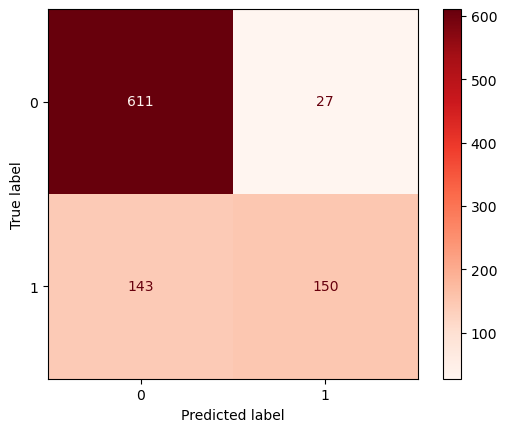

In [208]:
# Check Performance Model against Test-Set

y_pred_train_gridcv_pipe = grid_svc_pipe.predict(X_train)
y_pred_test_gridcv_pipe = grid_svc_pipe.predict(X_test)
print('SVM Tuning Pipe - Precision - Train Set : ',precision_score(y_train, y_pred_train_gridcv_pipe))
print('SVM Tuning Pipe- Precision - Test Set  : ',precision_score(y_test, y_pred_test_gridcv_pipe))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(grid_svc_pipe, X_test, y_test, cmap='Reds'))

## 9.1 Cross Valdiation

Untuk memastikan hasil Hyperparameter Tuning di atas maka akan kita Cross Validation

In [209]:
pre_score_train_cross_val_grid_svc_pipe = cross_val_score(grid_svc_pipe, 
                                           X_train, 
                                           y_train, 
                                           cv=5,
                                           scoring='precision')

print('Precision Score - All - Cross Validation  : ', pre_score_train_cross_val_grid_svc_pipe)
print('Precision Score - Mean - Cross Validation : ', pre_score_train_cross_val_grid_svc_pipe.mean())
print('Precision Score - Std - Cross Validation  : ', pre_score_train_cross_val_grid_svc_pipe.std())
print('Precision Score - Range of Test-Set       : ', (pre_score_train_cross_val_grid_svc_pipe.mean()-pre_score_train_cross_val_grid_svc_pipe.std()) ,
                                         '-', (pre_score_train_cross_val_grid_svc_pipe.mean()+pre_score_train_cross_val_grid_svc_pipe.std()))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Precision Score - All - Cross Validation  :  [0.83802817 0.86227545 0.8373494  0.8516129  0.85276074]
Precision Score - Mean - Cross Validation :  0.8484053310256735
Precision Score - Std - Cross Validation  :  0.009503235287058405
Precision Score - Range of Test-Set       :  0.8389020957386151 - 0.8579085663127319


In [210]:
print("Accuracy Score")
gridcv_pipe_best_train_score = grid_svc_pipe.score(X_train, y_train)
gridcv_pipe_test_score = grid_svc_pipe.score(X_test, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(gridcv_pipe_best_train_score, gridcv_pipe_test_score))
print("")
print("Precision Score")
train_precision_gridcv_pipe = precision_score(y_train, y_pred_train_gridcv_pipe)
test_precision_gridcv_pipe = precision_score(y_test, y_pred_test_gridcv_pipe)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_gridcv_pipe, test_precision_gridcv_pipe))
print("")


print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_gridcv_pipe))

Accuracy Score


Train Score: 0.8987012987012987
Test Score: 0.847457627118644

Precision Score
Train Precision: 0.8987012987012987
Test Precision: 0.847457627118644

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       638
           1       0.85      0.51      0.64       293

    accuracy                           0.82       931
   macro avg       0.83      0.73      0.76       931
weighted avg       0.82      0.82      0.80       931



kita akan masukkan ke dalam report agar hasil dapat lebih mudah dilihat dan di bandingkan

In [211]:
gridcvpipe_dict = {
    'Cross Validation Precision Mean' : pre_score_train_cross_val_grid_svc_pipe.mean(),
    'train - precision' : precision_score(y_train, y_pred_train_gridcv_pipe),
    'train - recall' : recall_score(y_train, y_pred_train_gridcv_pipe),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_gridcv_pipe),
    'train - f1_score' : f1_score(y_train, y_pred_train_gridcv_pipe),
    'test - precision' : precision_score(y_test, y_pred_test_gridcv_pipe),
    'test - recall' : recall_score(y_test, y_pred_test_gridcv_pipe),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_gridcv_pipe),
    'test - f1_score' : f1_score(y_test, y_pred_test_gridcv_pipe)
}

In [212]:
all_reports["LogisticRegression"] = logistic
all_reports["SVM"] = svca
all_reports["DecisionTree"] = decisiontree
all_reports["RandomForest"] = randomf
all_reports["Euclidean"] = euclidean
all_reports["Manhattan"] = manhattan
all_reports["Boosting"] = boosting
all_reports["GridCV_Pipe"] = gridcvpipe_dict
report = pd.DataFrame(all_reports)
report = report.transpose()
report = report.sort_values(by='Cross Validation Precision Mean', ascending=False)

In [213]:
report

,Cross Validation Precision Mean,train - precision,train - recall,train - accuracy,train - f1_score,test - precision,test - recall,test - accuracy_score,test - f1_score
GridCV_Pipe,0.848405,0.898701,0.529457,0.813810,0.666346,0.847458,0.511945,0.817401,0.638298
SVM,0.828103,0.869888,0.537108,0.809242,0.664144,0.824468,0.529010,0.816327,0.644491
SVM Pipeline,0.825653,0.869888,0.537108,0.809242,0.664144,0.824468,0.529010,0.816327,0.644491
Boosting,0.793097,0.793779,0.527161,0.785868,0.633563,0.773196,0.511945,0.799141,0.616016
Boosting Pipeline,0.793097,0.793779,0.527161,0.785868,0.633563,0.773196,0.511945,0.799141,0.616016
RandomForest Pipeline,0.733424,0.899425,0.718439,0.872918,0.798809,0.728814,0.587031,0.801289,0.650284
RandomForest,0.722324,0.880474,0.738332,0.872918,0.803163,0.697318,0.621160,0.795918,0.657040
DecisionTree,0.716187,0.931677,0.688600,0.872918,0.791905,0.726087,0.569966,0.796992,0.638623
DecisionTree Pipeline,0.714761,0.931677,0.688600,0.872918,0.791905,0.736607,0.563140,0.799141,0.638298
Euclidean,0.663475,0.797619,0.563887,0.796615,0.660690,0.639269,0.477816,0.750806,0.546875


Berdasarkan hasil dari nilai precision cross validation, model SVM pipeline yang telah di hyperparameter tuning lebih baik 0,02% dari model SVM yang telah di hypertuning tanpa di pipeline. Dapat disimpulkan kita akan menggunakan model GridCV_pipe untuk mempredict karyawan yang akan resign / tidak.

# 10. Model Evaluation

In [214]:
report

,Cross Validation Precision Mean,train - precision,train - recall,train - accuracy,train - f1_score,test - precision,test - recall,test - accuracy_score,test - f1_score
GridCV_Pipe,0.848405,0.898701,0.529457,0.813810,0.666346,0.847458,0.511945,0.817401,0.638298
SVM,0.828103,0.869888,0.537108,0.809242,0.664144,0.824468,0.529010,0.816327,0.644491
SVM Pipeline,0.825653,0.869888,0.537108,0.809242,0.664144,0.824468,0.529010,0.816327,0.644491
Boosting,0.793097,0.793779,0.527161,0.785868,0.633563,0.773196,0.511945,0.799141,0.616016
Boosting Pipeline,0.793097,0.793779,0.527161,0.785868,0.633563,0.773196,0.511945,0.799141,0.616016
RandomForest Pipeline,0.733424,0.899425,0.718439,0.872918,0.798809,0.728814,0.587031,0.801289,0.650284
RandomForest,0.722324,0.880474,0.738332,0.872918,0.803163,0.697318,0.621160,0.795918,0.657040
DecisionTree,0.716187,0.931677,0.688600,0.872918,0.791905,0.726087,0.569966,0.796992,0.638623
DecisionTree Pipeline,0.714761,0.931677,0.688600,0.872918,0.791905,0.736607,0.563140,0.799141,0.638298
Euclidean,0.663475,0.797619,0.563887,0.796615,0.660690,0.639269,0.477816,0.750806,0.546875


SVM Tuning Pipe - Precision - Train Set :  0.8987012987012987
SVM Tuning Pipe- Precision - Test Set  :  0.847457627118644
Confusion Matrix      : 
Accuracy Score
Train Score: 0.8987012987012987
Test Score: 0.847457627118644

Precision Score
Train Precision: 0.8987012987012987
Test Precision: 0.847457627118644

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       638
           1       0.85      0.51      0.64       293

    accuracy                           0.82       931
   macro avg       0.83      0.73      0.76       931
weighted avg       0.82      0.82      0.80       931



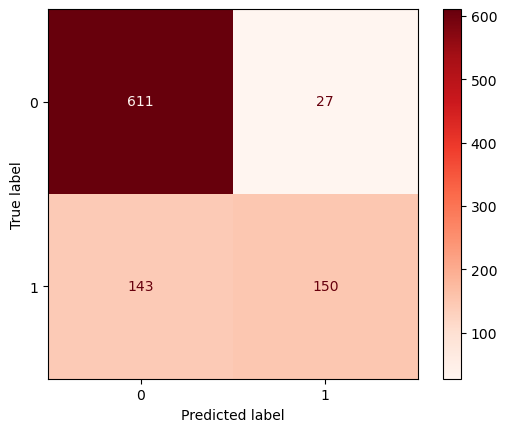

In [215]:
# Check Performance Model against Test-Set

y_pred_train_gridcv_pipe = grid_svc_pipe.predict(X_train)
y_pred_test_gridcv_pipe = grid_svc_pipe.predict(X_test)
print('SVM Tuning Pipe - Precision - Train Set : ',precision_score(y_train, y_pred_train_gridcv_pipe))
print('SVM Tuning Pipe- Precision - Test Set  : ',precision_score(y_test, y_pred_test_gridcv_pipe))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(grid_svc_pipe, X_test, y_test, cmap='Reds'))

print("Accuracy Score")
gridcv_pipe_best_train_score = grid_svc_pipe.score(X_train, y_train)
gridcv_pipe_test_score = grid_svc_pipe.score(X_test, y_test)

print('Train Score: {0}\nTest Score: {1}'.format(gridcv_pipe_best_train_score, gridcv_pipe_test_score))
print("")
print("Precision Score")
train_precision_gridcv_pipe = precision_score(y_train, y_pred_train_gridcv_pipe)
test_precision_gridcv_pipe = precision_score(y_test, y_pred_test_gridcv_pipe)

print('Train Precision: {0}\nTest Precision: {1}'.format(train_precision_gridcv_pipe, test_precision_gridcv_pipe))
print("")


print("TEST PERFORMANCE")
print(classification_report(y_test,y_pred_test_gridcv_pipe))

Dari hasil permodelan 8 buah algoritma diketahui nilainya sangat beragam, model yang paling jelek nilai precisionnya adalah model `Logistic Regression Pipeline` yaitu pada train = 0.52 dan pada test = 0.47

Dari permodelan juga ditemukan bahwa model gridcv_pipe atau model SVM yang sudah di **Hyperparameter Tuning dan Pipeline** adalah model yang goodfit dan paling bagus diantara model lainnya, karena nilai train =  0.89 dan nilai test = 0.84

Precision untuk kategori 0 (Karyawan yang tidak resign) adalah 0.81, yang berarti dari 100 karyawan yang kita prediksi akan resign akan ada 81 yang tidak resign

Precision untuk kategori 1 (Karyawan yang resign) adalah 0.85, yang berarti dari 100 karyawan yang kita prediksi akan resign akan ada 85 yang benar-benar resign

Kekurangan Model : Model masih masih bisa di tingkatkan lagi dengan menambahkan kolom(variable) baru

Future Improvement : Menambah faktor-faktor yang mempengaruhi seorang karyawan akan resign / tidak , Menambah jumlah data agar model dapat lebih baik lagi

# 11. Model Saving

In [216]:
# Save the files

with open("model.pkl", "wb") as file_1:
    pickle.dump(grid_svc_pipe, file_1)

with open("model_scaler.pkl", "wb") as file_2:
    pickle.dump(scaler, file_2)

with open("model_encoder_ordinal.pkl", "wb") as file_3:
    pickle.dump(encoder, file_3)

with open("model_encoder_nominal.pkl", "wb") as file_4:
    pickle.dump(encodern, file_4)

with open("list_num_col.txt", "wb") as file_5:
    pickle.dump(num_col, file_5)

with open("list_cat_cols_n.txt", "wb") as file_6:
    pickle.dump(cat_col_n, file_6)

with open("list_cat_cols_o.txt", "wb") as file_7:
    pickle.dump(cat_col_o, file_7)

with open("list_cat_col.txt", "wb") as file_8:
    pickle.dump(cat_col, file_8)

# 12. Kesimpulan / Conclusion

Dalam penelitian ini diketahui mayoritas karyawan bergelar Bachelors 77.4% (3061 karyawan) namun pada dataset ini diketahui pada dataset ini orang yang bergelar Master cenderung akan resign, mayoritas berdomisil di kota Bangalore 47.9%.
 

Penentuan model pada dataset ini adalah SVM Pipeline yang telah di hyperparameter tuning sehingga mendapatkan nilai train sebesar 89% dan test 84%. Dan metric yang di pakai pada penelitian ini adalah precision, karena Presisi digunakan saat perlu menghindari banyak false positive. Ini berguna dalam kasus di mana kesalahan sangat beresiko berisiko.

Saran yang bisa diambil untuk mengatasi para karyawan yang resign (terutama pada karyawan yang bergelar Master):

1. Exit Interview yang Mendalam:

Karena mempertahankan karyawan yang ada (apalagi bergelar tinggi) memerlukan cost yang lebih sedikit daripada harus merekrut karyawan baru.
Lakukan exit interview yang mendalam dengan karyawan yang mengundurkan diri. Pertimbangkan untuk menggunakan pihak ketiga atau orang yang independen untuk melakukan wawancara ini agar karyawan merasa lebih nyaman dalam berbicara. Pertanyakan alasan mereka untuk resign, harapan mereka, dan masukan konstruktif untuk perbaikan dan apabila memungkinkan dibujuk agar tetap bertahan

2. Retensi Karyawan:

Fokus pada upaya retensi karyawan yang ada dengan peningkatan program insentif, keseimbangan work life balance, pelatihan, dan peluang karir. Pastikan karyawan merasa dihargai dan memiliki peluang untuk pertumbuhan karier di perusahaan.

3. Evaluasi Kebijakan dan Kepuasan Karyawan:

Tinjau kembali kebijakan perusahaan dan jajaran manajemen. Pastikan bahwa karyawan merasa didukung, dihargai, dan memiliki peluang untuk pertumbuhan. Survei kepuasan karyawan dapat membantu Anda memahami perasaan dan kebutuhan karyawan Anda.

4. Fleksibilitas dan Penyesuaian:

Pertimbangkan untuk memberikan fleksibilitas dalam beban kerja atau lingkungan kerja yang mendukung karyawan yang memiliki komitmen lain di luar pekerjaan(melanjutkan pendidikan). Ini bisa membantu menarik dan mempertahankan bakat berkualifikasi tinggi.


# 13. Conceptual Problem

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

    Bagging (Bootstrap Aggregating) adalah salah satu metode ensemble dalam machine learning yang bertujuan untuk meningkatkan kinerja model prediktif dengan menggabungkan hasil dari beberapa model yang dibangun berdasarkan sampel data yang diambil secara acak dengan penggantian.

    Cara kerja bagging secara sederhana adalah sebagai berikut:

    - Bootstrap Sampling: Langkah pertama dalam bagging adalah mengambil sejumlah sampel acak dengan penggantian dari data pelatihan asli. Dalam setiap sampel, beberapa data mungkin muncul lebih dari sekali, sementara yang lain mungkin tidak muncul sama sekali. Ini menciptakan variasi dalam setiap sampel yang diambil.

    - Model Pemilihan: Untuk setiap sampel bootstrap, kita membangun model yang sama atau berbeda, seperti pohon keputusan, regresi linier, atau model lainnya. Kita dapat menggunakan algoritma pembelajaran yang sama atau berbeda untuk setiap model.

    - Prediksi Gabungan: Setelah membangun sejumlah model, kita menggabungkan hasil prediksi dari masing-masing model tersebut. Dalam kasus klasifikasi, ini bisa dilakukan dengan mengambil mayoritas suara dari semua model (voting), sedangkan dalam regresi, bisa dilakukan dengan mengambil rata-rata prediksi.

    - Hasil Akhir: Hasil prediksi gabungan ini adalah output akhir dari metode bagging dan biasanya lebih stabil dan akurat daripada model tunggal.

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

    Inti perbedaan utama adalah bahwa Random Forest menggunakan pohon-pohon yang dibangun secara independen dengan sampling acak, sementara algoritma boosting, seperti AdaBoost, membangun pohon-pohon secara berjenjang, memfokuskan perhatian pada data yang sulit diprediksi. Kedua metode ini memiliki keunggulan dan kelemahan masing-masing dan cocok untuk situasi yang berbeda dalam machine learning.

3. Jelaskan apa yang dimaksud dengan Cross Validation !

    Cross-validation adalah salah satu teknik penting dalam evaluasi dan validasi kinerja model machine learning. Tujuan utamanya adalah untuk mengukur sejauh mana model yang telah dibangun dapat menggeneralisasi hasil prediksi ke data yang belum pernah dilihat sebelumnya. Cross-validation melibatkan pembagian dataset menjadi dua bagian utama: bagian pelatihan (training set) dan bagian pengujian (test set), dengan beberapa variasi yang lebih kompleks.

    Manfaat utama dari cross-validation adalah sebagai berikut:

    - Mengurangi Bias: Dengan melakukan berbagai iterasi pengujian pada subset yang berbeda, cross-validation membantu mengurangi bias yang mungkin muncul jika kita hanya menggunakan satu pemisahan data training dan testing.

    - Mengukur Stabilitas: Cross-validation memberikan perkiraan yang lebih stabil tentang kinerja model daripada hanya menggunakan satu set pengujian.

    - Pemilihan Model: Ini membantu dalam membandingkan kinerja beberapa model atau algoritma berbeda untuk memilih yang terbaik.

    - Mengoptimalkan Parameter: Cross-validation juga berguna untuk mengoptimalkan parameter model. Dengan mencoba berbagai kombinasi parameter pada setiap iterasi, Anda dapat menentukan parameter yang memberikan hasil terbaik.

Cross-validation adalah alat penting dalam proses pengembangan model machine learning dan membantu memastikan bahwa model yang dibangun dapat diandalkan dan mampu mengatasi beragam data uji yang mungkin dihadapi di dunia nyata.
